In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid


In [27]:
# Random weights and distances for each grid cell, for reproducibility
np.random.seed(42)
w_ij = np.random.rand(100, 100)
d_ij = np.random.rand(100, 100)

# Constants for the problem
alpha = 0.5
beta = 0.5
gamma = 1.0
Budget = 400000  # Example budget

Iteration 0: Current cost = 9077.299921617345, Objective value = 6253.834865587612
Iteration 100: Current cost = 9357.790043361028, Objective value = 6246.754871931495
Iteration 200: Current cost = 9656.265629331536, Objective value = 6239.207444336401
Iteration 300: Current cost = 9974.535383395983, Objective value = 6231.144349660096
Iteration 400: Current cost = 10314.662396172791, Objective value = 6222.510423432816
Iteration 500: Current cost = 10679.011108937679, Objective value = 6213.242268398979
Iteration 600: Current cost = 11070.30520346437, Objective value = 6203.266646558335
Iteration 700: Current cost = 11491.69953026488, Objective value = 6192.498476727742
Iteration 800: Current cost = 11946.870250337499, Objective value = 6180.83831951462
Iteration 900: Current cost = 12440.128855779216, Objective value = 6168.169189356193
Iteration 1000: Current cost = 12976.567852540746, Objective value = 6154.352473304745
Iteration 1100: Current cost = 13562.248941855818, Objective v

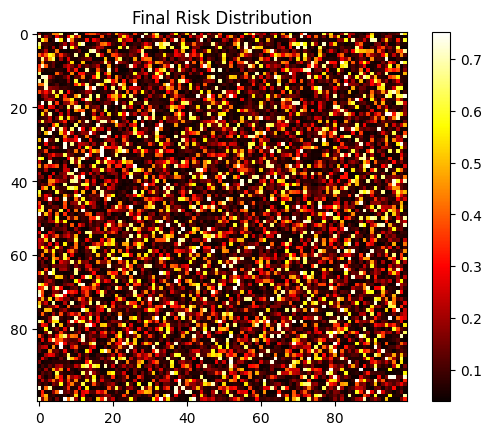

In [34]:
# Objective function
def objective_function(e_ij):
    f_ij = sigmoid(e_ij)
    return np.sum(w_ij * f_ij + alpha * (f_ij)**2 - beta * np.log(1 + gamma * f_ij))

# Scaled cost function to include the random distances
def scaled_c(f_ij, d_ij):
    return 100 * d_ij * (1 - f_ij)

# Gradient of the objective function with respect to e_ij
def gradient(e_ij):
    f_ij = sigmoid(e_ij)
    df_dc = sigmoid_derivative(e_ij)
    grad_risk_term = (w_ij + 2 * alpha * f_ij) * df_dc
    grad_log_term = -beta * (gamma * df_dc) / (1 + gamma * f_ij)
    return grad_risk_term - grad_log_term

# Derivative of the sigmoid function
def sigmoid_derivative(e_ij):
    return sigmoid(e_ij) * (1 - sigmoid(e_ij))

# Gradient descent parameters
learning_rate = 0.01
iterations = 10000

# Initialize e_ij with all ones
e_ij = np.full((100, 100), 4.0)

# Perform gradient descent optimization
for i in range(iterations):
    grad = gradient(e_ij) 
    e_ij -= learning_rate * grad
    f_ij = sigmoid(e_ij)
    current_cost = np.sum(scaled_c(f_ij, d_ij))
    current_objective_value = objective_function(e_ij)
    
    if current_cost > Budget:
        print(f"Budget exceeded at iteration {i}: Current cost = {current_cost}")
        break

    if i % 100 == 0:
        print(f"Iteration {i}: Current cost = {current_cost}, Objective value = {current_objective_value}")

# Final objective function value
final_objective_value = objective_function(e_ij)
print(f"Final objective function value: {final_objective_value}")

# Plotting the final risk distribution
final_f_ij = sigmoid(e_ij)
plt.imshow(final_f_ij, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Final Risk Distribution')
plt.show()


Baseline Final objective function value: 296.9861096534257


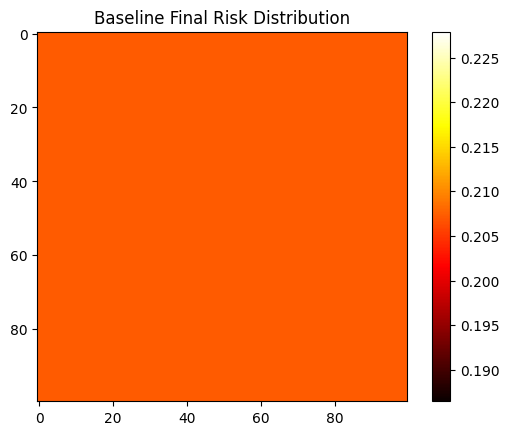

In [33]:
# Baseline approach: start with e_ij = 1 for all e_ij and decrease equally until the budget is reached

# Initialize e_ij with all ones
e_ij_baseline = np.full((100, 100), 10.0)

# Find the step to decrease e_ij to stay within the budget
budget_reached = False
decrement_step = 0.001

while not budget_reached:
    f_ij_baseline = sigmoid(e_ij_baseline)
    current_cost = np.sum(scaled_c(f_ij_baseline, d_ij))
    if current_cost >= Budget:
        budget_reached = True
    else:
        # Equally decrease all e_ij
        e_ij_baseline -= decrement_step

# Calculate the final objective value for the baseline approach
final_objective_value_baseline = objective_function(e_ij_baseline)
print(f"Baseline Final objective function value: {final_objective_value_baseline}")

# Plotting the final risk distribution for the baseline approach
final_f_ij_baseline = sigmoid(e_ij_baseline)
plt.imshow(final_f_ij_baseline, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Baseline Final Risk Distribution')
plt.show()

